In [1]:
print('go')
import optim_esm_tools as oet
%run ../amoc_collapse_scripts/imports.py
from amoc_collapse_scripts import amoc_deep_dive, amoc_deep_dive_group

go
Hi there, have a great and productive day :)


In [3]:
base = "/data/volume_2/tipping_figures/2024_05_07_amoc/"
config = amoc_deep_dive_group.read_config(f'{base}/config.json')
oet.config.config.read_dict(config['config_update'])

figures_folder = os.path.join(base, 'paper', 'v2024.09.05_paper')
save_kw = dict(save_in=figures_folder, dpi=300, file_types=('png',))

In [4]:
def gausian_filter(y, n=100,mu=7.5):
    b = gaussian(n, mu)
    gauss = scipy.ndimage.convolve1d(y, b / b.sum())
    return gauss

smoother = gausian_filter

In [5]:
oet.utils.setup_plt()

In [6]:
folder_dict: ty.Dict[str, str] = amoc_deep_dive_group.read_config(config['read_from'])

In [7]:
for l in sorted(folder_dict):
    if folder_dict[l].get('folder_siconca') and not folder_dict[l].get('folder_siconc'):
        folder_dict[l]['folder_siconc']=folder_dict[l].get('folder_siconca')

In [8]:
rename_dict = {'Greenland Sea': 'Nordic Seas', 
               'Norwegian Sea': 'Nordic Seas',
               'North Atlantic Ocean': 'Irminger Sea',
               'Baffin Bay': 'Labrador Sea',
               'Davis Strait': 'Labrador Sea'}

In [9]:
_cc = oet.utils.get_plt_colors()
del _cc[1:4]
global_color_dict = {v:k for k,v in zip(_cc, ['Nordic Seas', 
'Irminger Sea',
'Labrador Sea',])}
global_color_dict

{'Nordic Seas': '#e41a1c',
 'Irminger Sea': '#ff7f00',
 'Labrador Sea': '#a65628'}

In [10]:
result_bucket = {}
for label in oet.utils.tqdm(sorted(folder_dict)):

    print(f'------------{label}--------------')
    if 'MRI' not in label:
        continue
    ds_mlotst = oet.read_ds(
            folder_dict[label]["folder_mlotst"],
            add_history=True,
            max_time=None,
        ).load()
    amoc_deep_dive.set_time_int(ds_mlotst);

    result_bucket[label] = amoc_deep_dive.plot_mlotst_cells_full_ret(
            ds_mlotst,
            reference_depth=650,
            smooth_reference=True,
            min_cells=25,
            max_cells=200,
            show=False,
            label=label,
            field='mlotst_march',
            year_sel = slice(1965, 1995),
            mean_or_max='mean',
            _split_kw=dict(min_cells=10),
        rename_dict=rename_dict
            )


  0%|          | 0/26 [00:00<?, ?it/s]

------------ACCESS-CM2 ssp126 r1i1p1f1--------------
------------ACCESS-CM2 ssp585 r1i1p1f1--------------
------------ACCESS-ESM1-5 ssp126 r1i1p1f1--------------
------------ACCESS-ESM1-5 ssp585 r1i1p1f1--------------
------------CESM2-WACCM ssp126 r1i1p1f1--------------
------------CESM2-WACCM ssp585 r1i1p1f1--------------
------------CanESM5 ssp126 r1i1p1f1--------------
------------CanESM5 ssp585 r1i1p1f1--------------
------------GISS-E2-1-G ssp126 r1i1p1f2--------------
------------GISS-E2-1-G ssp126 r3i1p1f2--------------
------------GISS-E2-1-G ssp126 r4i1p1f2--------------
------------GISS-E2-1-G ssp245 r1i1p1f2--------------
------------GISS-E2-1-G ssp245 r3i1p1f2--------------
------------GISS-E2-1-G ssp370 r1i1p1f2--------------
------------GISS-E2-1-G ssp370 r3i1p1f2--------------
------------GISS-E2-1-G ssp585 r1i1p1f2--------------
------------GISS-E2-1-G ssp585 r3i1p1f2--------------
------------GISS-E2-1-G ssp585 r4i1p1f2--------------
------------IPSL-CM6A-LR ssp126 r1

In [11]:
def bake_title(res_0, res_1):
    title = res_0.label.split()
    if res_1 is not None:
        if res_1.label.split()[2] != title[2]:
            title[2] = ', '.join(sorted([title[2] , res_1.label.split()[2]]))
        else:
            title[1] = ', '.join(sorted([title[1] , res_1.label.split()[1]]))
    return ' '.join(title)

In [12]:
k = 'MRI-ESM2-0 ssp585 r1i1p1f1'
res = result_bucket[k]

ds_hfds = oet.read_ds(folder_dict[k]['folder_hfds'], max_time=None, add_history=True)
ds_tos = oet.read_ds(folder_dict[k]['folder_tos'], max_time=None, add_history=True)


In [13]:
ds_transport = oet.load_glob('/data/volume_2/tipping_figures/2024_02_27_msft_v12/2024_08_01_from_jenny/Atlantic_OHT_26.5N_240801.nc')

In [14]:
da = ds_transport.sel(members='6_MRI-ESM2-0_r1i1p1f1')
v = np.concatenate([da['H_hist'].values, da['H_585'].values])
v = v[~np.isnan(v)]
t = np.arange(1850, 2301)

In [15]:
reg = regionmask.defined_regions.natural_earth_v5_0_0.ocean_basins_50.mask_3D(ds_hfds)

In [16]:
keep_idx = [0,2, 14, 17,20,31,32,35,39,40,41,55,
            56,57,60,65, 81, 83]

In [17]:
tot = None
for idx in keep_idx:
    da= reg.sel(region=keep_idx)
    if tot is None:
        tot = da
    else:
        tot = tot | da
tot = tot.sum('region')

In [18]:
tot = tot.where(tot.lat>26.5, drop=False)
tot.data[tot.isnull()] = 0
tot = tot.astype(bool)

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lat      (lat) float64 89.24 88.25 87.25 86.26 ... -87.25 -88.25 -89.24
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

In [19]:
mask_sum = res.masks[0]
for m in res.masks[1:]:
    mask_sum = mask_sum | m

In [20]:
mask_north_atlantic = tot

In [21]:
ds_thetao = oet.load_glob(folder_dict[k]['thetao_path'])
amoc_deep_dive.set_time_int(ds_thetao)

res_thetao = amoc_deep_dive.BaseMaskedProducer(
    ds=ds_thetao, 
    mask=mask_north_atlantic
).get_mean_time_series()

In [22]:
ds_thetao["lev_size"] = xr.DataArray(np.diff(ds_thetao["lev_bnds"])[:, 0], dims="lev")
a = ds_thetao.isel(time=0).load()


In [23]:
tot_depth = a['cell_area'].copy()
tot_depth[:] = 0

In [24]:
for i, lev_d in enumerate(a['lev_size'].values):
    lev_slice = a['thetao'].isel(lev=i).load()
    tot_depth.data[~np.isnan(lev_slice.values)] += lev_d

In [25]:
volume = a['cell_area'] * tot_depth
float(np.sum(volume.where(mask_north_atlantic)))

9.00753258222507e+16

In [26]:
def calculate_heating_power_pw(dT, dt_year=1):    
    rho = 1025 # kg/m3
    c = 3850 #J/(kg C)
    p = 0.2 # PW
    dt = dt_year * 365 * 24 * 3600 # s
    d = 3300 #m depth
    volume = float(np.sum((a['cell_area'] * tot_depth).where(mask_north_atlantic)))
    mass = rho * volume 
    return c * mass * (dT) / dt/ 1e15

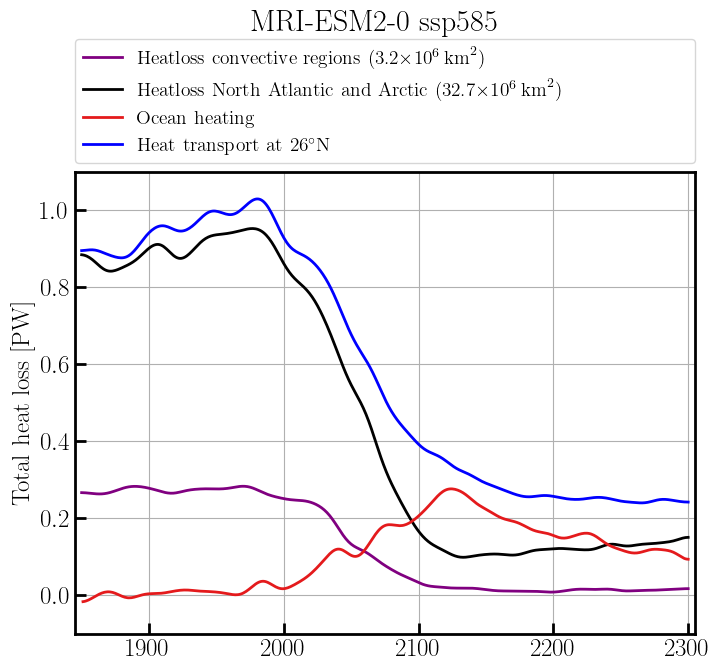

In [27]:
rm = 30
for m, l in zip(res.masks + [mask_sum,
                             mask_north_atlantic
                            ], 
                res.labels + ['Heatloss convective regions', 'Heatloss North Atlantic and Arctic']):
    if 'Heatloss' not in l and '+' not in l:
        continue
    ds_sel = ds_hfds.where(m, drop=True)
    amoc_deep_dive.set_time_int(ds_sel)
    da = ds_sel['hfds'].astype(np.float64) * ds_hfds['cell_area'].astype(np.float64)
    label = res.region_names.get(l, l)
    c=global_color_dict.get(label, 'k')
    if all(k in label for k in 'convective'):
        c='purple'
    legend_label = f'{label} ({float(ds_hfds["cell_area"].where(m).sum()/1e12):.1f}$\\times10^{{6}}\,\\mathrm{{km}}^2$)'
    aa = (da.sum(['lat', 'lon'])/-1e15).values
    plt.plot(da['time'], smoother(aa), label=legend_label, c=c)
    



plt.suptitle(f'{k.split()[0]} {k.split()[1]}', y=1.15)

plt.plot(ds_thetao['time'].values[1:], smoother(calculate_heating_power_pw(np.diff(res_thetao[1]))), 
         label='Ocean heating')

plt.ylabel('Total heat loss [PW]')

plt.plot(t,smoother(v), c='blue', label='Heat transport at 26$^\circ$N')

plt.legend(**oet.utils.legend_kw(ncol=1,))
plt.xlim(1850-5,2300+5)
plt.ylim(-0.1,1.1)
oet.utils.save_fig(f'heat_budget_mri_ssp585', **save_kw, sub_dir = 'figure_s6')

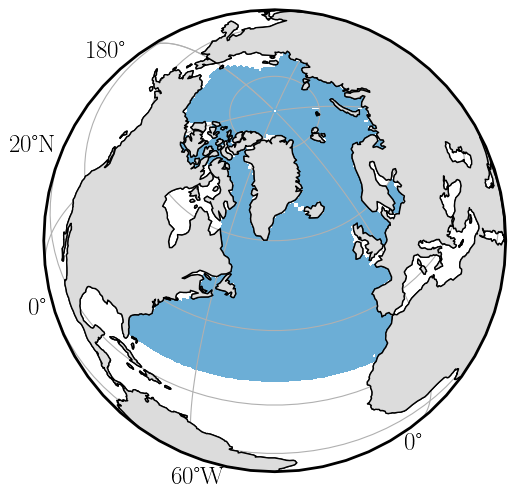

In [28]:
projection='NearsidePerspective'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from functools import partial
xmin, xmax = 0, 359
ymin, ymax = 0, 90
ax = plt.gcf().add_subplot(
    1,1,1,projection=oet.plotting.plot.get_cartopy_projection(projection=projection, 
                                                              central_longitude=-40,
                                                              central_latitude=60,
                                                             satellite_height=4e7)
)
# ax.set_extent([xmin, xmax,ymin,ymax])
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='k', facecolor='gainsboro', zorder=2))

#     plt.xlim(-70, 20)
#     plt.ylim(40, 80)

ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, zorder=1)
gl.top_labels=False
gl.right_labels=False
_temp = mask_north_atlantic.copy().astype(np.float16)
_temp.data[_temp.values<=0] = np.nan

_temp.plot(transform=oet.plotting.plot.get_cartopy_transform(), add_colorbar=False, cmap='Blues')
# plt.suptitle('wrong old mask')

oet.utils.save_fig(f'atlantic_arctic_mask', **save_kw, sub_dir = 'figure_s6')